Business Problem
predicting and ensuring high-quality wine production, which ultimately improves profitability through better quality control, optimized production, and targeted marketing strategies.

step -1 : Bussiness Problem Understanding

In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_auc_score, roc_curve,classification_report,mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier





import warnings
warnings.simplefilter("ignore")

step - 2 : Data Understanding

In [75]:
data=pd.read_csv("winequality-red.csv")

In [76]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [78]:
for i in data:
    print(i)
    print(data[i].value_counts())
    

fixed acidity
fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur 

In [79]:
continues=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

descrite=["quality_label"]




In [80]:
data.shape

(1599, 12)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [82]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Step 3 :Data Cleaning

In [83]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Step - 4 : Data Preprocessing

In [84]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

In [85]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [86]:
# there no need of  dropping of the  columns.
# there is need of encoding

Step - 5 : Data Visualization

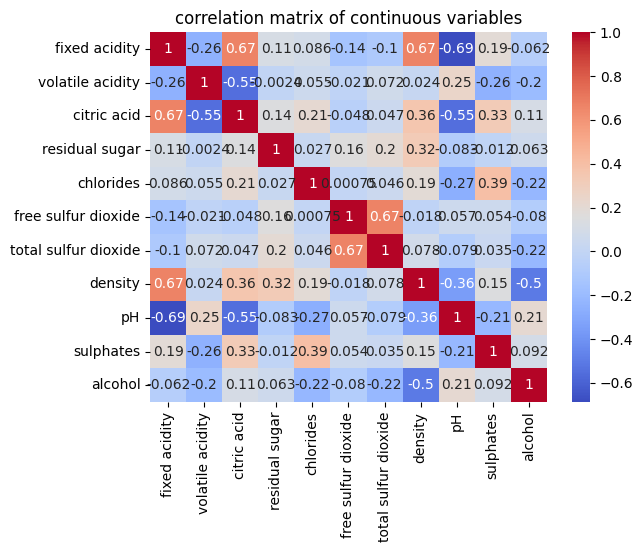

In [87]:
sns.heatmap(data[continues].corr(),annot=True,cmap="coolwarm")
plt.title("correlation matrix of continuous variables")
plt.show()

In [88]:
# Create a dichotomous variable for wine quality
data['quality_label'] = data['quality'].apply(lambda x: 'good' if x > 6.5 else 'bad')

In [89]:
#  Filter out the original 'quality' column to prevent data leakage
data = data.drop(columns=['quality'])


# Convert 'quality_label' to numerical values (1 for good, 0 for bad)
data['quality_label'] = data['quality_label'].apply(lambda x: 1 if x == 'good' else 0)

In [90]:
data["quality_label"].value_counts()

quality_label
0    1175
1     184
Name: count, dtype: int64

Train | Test Split

In [91]:
#  Define features and target variable
X = data.drop(columns=['quality_label'])
Y = data['quality_label']

In [92]:
#  Split the data into training and test sets (75% training, 25% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

Stratifying according to the variable y - means that it will try to evenly distribute the values of y in each split.
So if y takes values either 0 or 1 as a label, and 80% of the labels in the dataset is with value 0, and 20% label 1. Then stratifying according to y, means that the test_train_splot will try to ensure that the distribution of labels in the y_test and y_train are the same as it is in the entire dataset.

Modelling

In [93]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model=Sequential([Dense(64,activation="relu",input_shape=(X_train.shape[1],)),
                  Dense(32,activation="relu"),
                  Dense(1)
            ])

In [94]:
model.compile(optimizer="adam",loss="mean_squared_error")
history=model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1922 - val_loss: 0.1111
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1061 - val_loss: 0.0937
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 - val_loss: 0.0863
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0812 - val_loss: 0.0834
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0748 - val_loss: 0.0836
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0763 - val_loss: 0.0824
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0733 - val_loss: 0.0862
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0803 - val_loss: 0.0859
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0742 - val_loss: 0.0800
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0650 - val_loss: 0.0790
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0648 - val_loss: 0.0796
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [95]:
#Evaluate the model on the test set
test_loss=model.evaluate(X_test,Y_test,verbose=0)
print(f"Test Loss (MSE).{test_loss}")

y_pred=model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
rmse=np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mse}")
print(f"Root mean Squared Error (RMSE): {mse}")
print(f"R2 score:{r2}")





Test Loss (MSE).0.1274929940700531
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.12928585162559156
Mean Absolute Error (MAE): 0.12928585162559156
Root mean Squared Error (RMSE): 0.12928585162559156
R2 score:-0.10510528087615967


In [96]:
from sklearn.metrics import confusion_matrix
threshold = 0.5  # Adjust based on your problem
y_pred_class = (y_pred > threshold).astype(int)
Y_test_class = (Y_test > threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test_class, y_pred_class)
print(cm)

[[270  24]
 [ 25  21]]


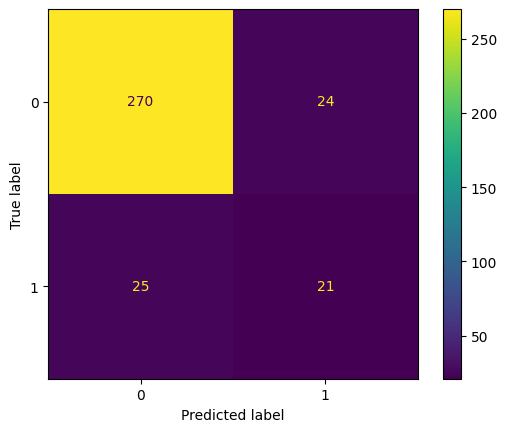

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=data["quality_label"].unique()).plot()
plt.show()

Modelling


In [98]:
from sklearn.model_selection import cross_val_score
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier()
}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(Y_train, train_pred)
    test_accuracy = accuracy_score(Y_test, test_pred)
    cv_score = cross_val_score(model, X, Y, cv=5).mean()
    
    # Print results
    print(f"{model_name} Results:")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Cross Validation Score: {cv_score}")
    print()

Decision Tree Results:
Train Accuracy: 1.0
Test Accuracy: 0.8294117647058824
Cross Validation Score: 0.8123860429780768

Logistic Regression Results:
Train Accuracy: 0.8763493621197253
Test Accuracy: 0.8705882352941177
Cross Validation Score: 0.8712421315389625

Random Forest Results:
Train Accuracy: 1.0
Test Accuracy: 0.888235294117647
Cross Validation Score: 0.8668222270457997

Support Vector Classifier (SVM) Results:
Train Accuracy: 0.9028459273797841
Test Accuracy: 0.8823529411764706
Cross Validation Score: 0.8646082049055785

K-Nearest Neighbors (KNN) Results:
Train Accuracy: 0.9028459273797841
Test Accuracy: 0.8676470588235294
Cross Validation Score: 0.8528489255480791



Conclusion:
Best Overall Model: Logistic Regression has a strong balance between train, test, and cross-validation scores.
High Performer: Random Forest and SVM both have slightly higher test accuracy but show more signs of overfitting (especially Random Forest).
Therefore, Logistic Regression appears to be the best choice if you're looking for a well-generalized model with consistent performance across different data sets. If you're okay with slight overfitting and want higher test accuracy, Random Forest or SVM can also be good choices.

Therefore, Logistic Regression appears to be the best choice if you're looking for a well-generalized model with consistent performance across different data sets. If you're okay with slight overfitting and want higher test accuracy, Random Forest or SVM can also be good choices.

In [99]:
#prediction
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)  # Use Y_train instead of Y_test
ypred_train = log_reg.predict(X_train)


Evaluation

In [100]:
#prediction
ypred_test=log_reg.predict(X_test)
print("Test accuracy:",accuracy_score(Y_test,ypred_test))

Test accuracy: 0.8705882352941177


Classification Report

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       294
           1       0.54      0.30      0.39        46

    accuracy                           0.87       340
   macro avg       0.72      0.63      0.66       340
weighted avg       0.85      0.87      0.85       340



ROC Curve

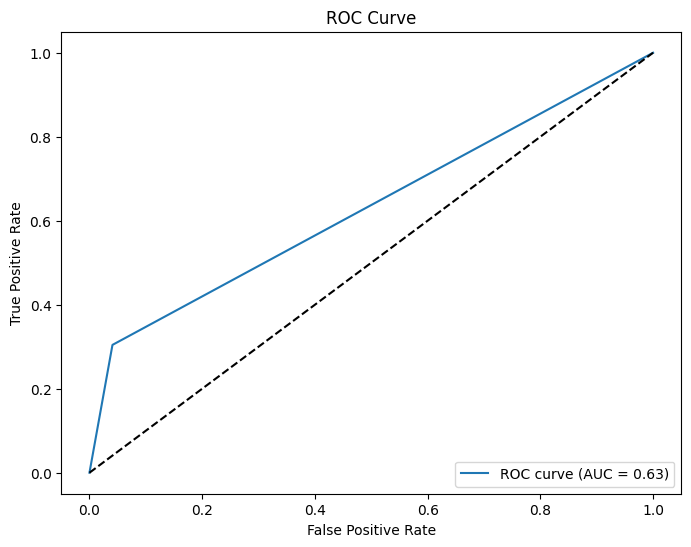

0.6317657497781721

In [102]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
roc_auc = roc_auc_score(Y_test, ypred_test)
fpr, tpr, thresholds = roc_curve(Y_test, ypred_test)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
roc_auc